In [1]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import math
import itertools
import statistics
import seaborn as sns
import matplotlib.transforms as transforms

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/Mining_Research/Data_Set_Bench_Study_final_data.csv")

df.head()

,No,BA,BH,BW,SA,JA,JC,JF,FoS
0,1,70.0,10.0,18.0,38.69,15.0,2.0,3.0,0.20
1,2,32.0,5.0,20.0,15.46,22.0,24.0,22.0,4.96
2,3,33.0,14.0,30.0,21.13,12.0,30.0,32.0,2.90
3,4,31.5,12.0,24.0,21.05,14.5,33.0,28.0,2.28
4,5,28.0,9.5,15.0,20.44,8.2,35.0,23.7,2.90


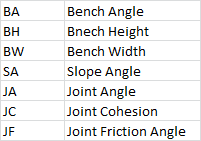

In [4]:
np.mean(df)

28.668082666666667

<Axes: xlabel='BH', ylabel='BW'>

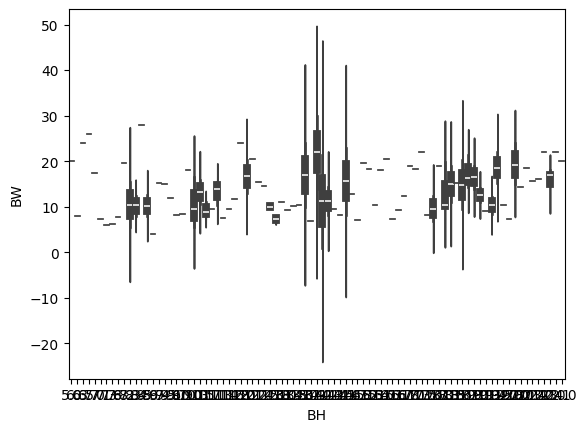

In [5]:
import seaborn as sns
sns.violinplot(x=df['BH'],y=df['BW'])

In [6]:
df.shape

(125, 9)

In [7]:
df['FoS']

,FoS
0,0.20
1,4.96
2,2.90
3,2.28
4,2.90
...,...
120,0.61
121,0.69
122,0.65
123,0.64


In [8]:
class_label = np.where(df['FoS'] > 1.3, 1, 0)

In [9]:
class_label

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [155]:
#df['class_label'] = pd.Categorical(df['Slope_stability']).codes
df['class_label'] = np.where(df['FoS'] > 1.3, 1, 0)
df[:][0:10]

,No,BA,BH,BW,SA,JA,JC,JF,FoS,class_label
0,1,70.0,10.0,18.0,38.69,15.0,2.0,3.0,0.20,0
1,2,32.0,5.0,20.0,15.46,22.0,24.0,22.0,4.96,1
2,3,33.0,14.0,30.0,21.13,12.0,30.0,32.0,2.90,1
3,4,31.5,12.0,24.0,21.05,14.5,33.0,28.0,2.28,1
4,5,28.0,9.5,15.0,20.44,8.2,35.0,23.7,2.90,1
5,6,24.0,7.0,17.5,15.93,4.5,38.0,26.0,4.55,1
6,7,22.7,8.2,19.6,15.79,3.4,40.0,27.4,4.40,1
7,8,28.5,7.7,7.7,22.95,2.4,55.0,29.8,4.00,1
8,9,18.2,11.3,14.0,15.24,25.0,15.0,14.0,3.17,1
9,10,65.0,8.5,28.0,25.58,7.3,24.5,23.7,3.12,1


In [156]:
df.columns

Index(['No', 'BA', 'BH', 'BW', 'SA', 'JA', 'JC', 'JF', 'FoS', 'class_label'], dtype='object')

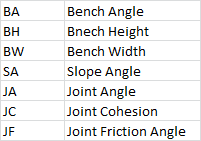

# Draw Violin Plots for each Features with respect to Stability and failure

<ipython-input-166-bd34e03fcc54>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin1=sns.violinplot(x ='class_label', y ='SA', data = df, palette=my_pal)


[Text(0.5, 0, 'Stability'), Text(0, 0.5, 'Slope Angle')]

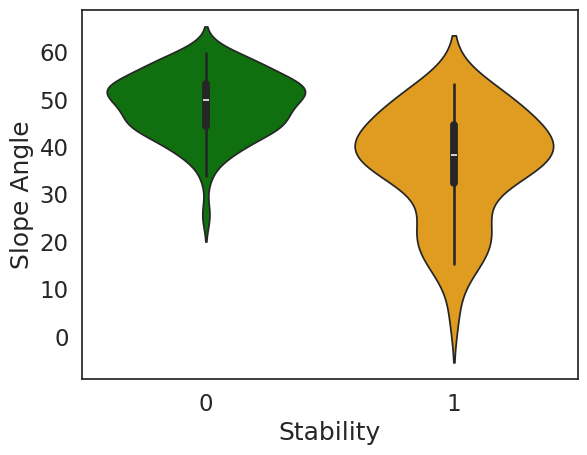

In [166]:
import seaborn as sns

# creating a dictionary with one specific color per group:
my_pal = {"0": "green", "1": "orange"}

violin1=sns.violinplot(x ='class_label', y ='SA', data = df, palette=my_pal)
violin1.set(xlabel ="Stability", ylabel = "Slope Angle")

# Pairwise correlation plot python

# Code 1 [Pairwise Correlation]

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes, fontsize=15, weight='bold', color='b')
    # ax.annotate("p = {:.3f}".format(p),
    #             xy=(.4, .9), xycoords=ax.transAxes)

############# Main Section ############
# loading dataset using seaborn
#df = seaborn.load_dataset('tips')

df1=df.drop(['No','class_label','FoS'], axis=1)
df1 = df1.set_axis(["Bench Angle", "Bench Height", "Bench Width", "Slope Angle", "Joint Angle","Joint Cohesion","Joint Friction Angle"], axis=1)


print(df1)
# pairplot with hue sex
#seaborn.pairplot(df1, hue ='class_label')
#seaborn.pairplot(df1)
# to show
#plt.show()
graph = sns.pairplot(df1, corner=False)
#g = sns.PairGrid(df1,diag_sharey=False, corner=True)
#g = sns.PairGrid(df1,diag_sharey=False)

graph.map_diag(sns.histplot, kde=True)
graph.map_lower(sns.scatterplot)
graph.map_upper(sns.scatterplot)
#graph.map_diag(sns.histplot, kde=True)
#graph = sns.pairplot(df1,corner=True)


graph.map(corrfunc)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Code 2 [Pairwise Correlation Plot]

       BA    BH    BW     SA    JA    JC    JF
0    70.0  10.0  18.0  38.69  15.0   2.0   3.0
1    32.0   5.0  20.0  15.46  22.0  24.0  22.0
2    33.0  14.0  30.0  21.13  12.0  30.0  32.0
3    31.5  12.0  24.0  21.05  14.5  33.0  28.0
4    28.0   9.5  15.0  20.44   8.2  35.0  23.7
..    ...   ...   ...    ...   ...   ...   ...
120  68.8  19.4   8.5  58.87  29.4  12.0  18.7
121  68.3  19.8   7.4  59.74  28.5  15.0  20.4
122  65.7  15.3  18.4  43.26  36.8   2.0  17.4
123  66.6  20.1  14.3  51.76  28.8   4.0  19.1
124  69.3  18.5  11.1  55.96  27.9   3.0  21.1

[125 rows x 7 columns]
     Bench Angle  Bench Height  Bench Width  Slope Angle  Joint Angle  \
0           70.0          10.0         18.0        38.69         15.0   
1           32.0           5.0         20.0        15.46         22.0   
2           33.0          14.0         30.0        21.13         12.0   
3           31.5          12.0         24.0        21.05         14.5   
4           28.0           9.5         15.0    

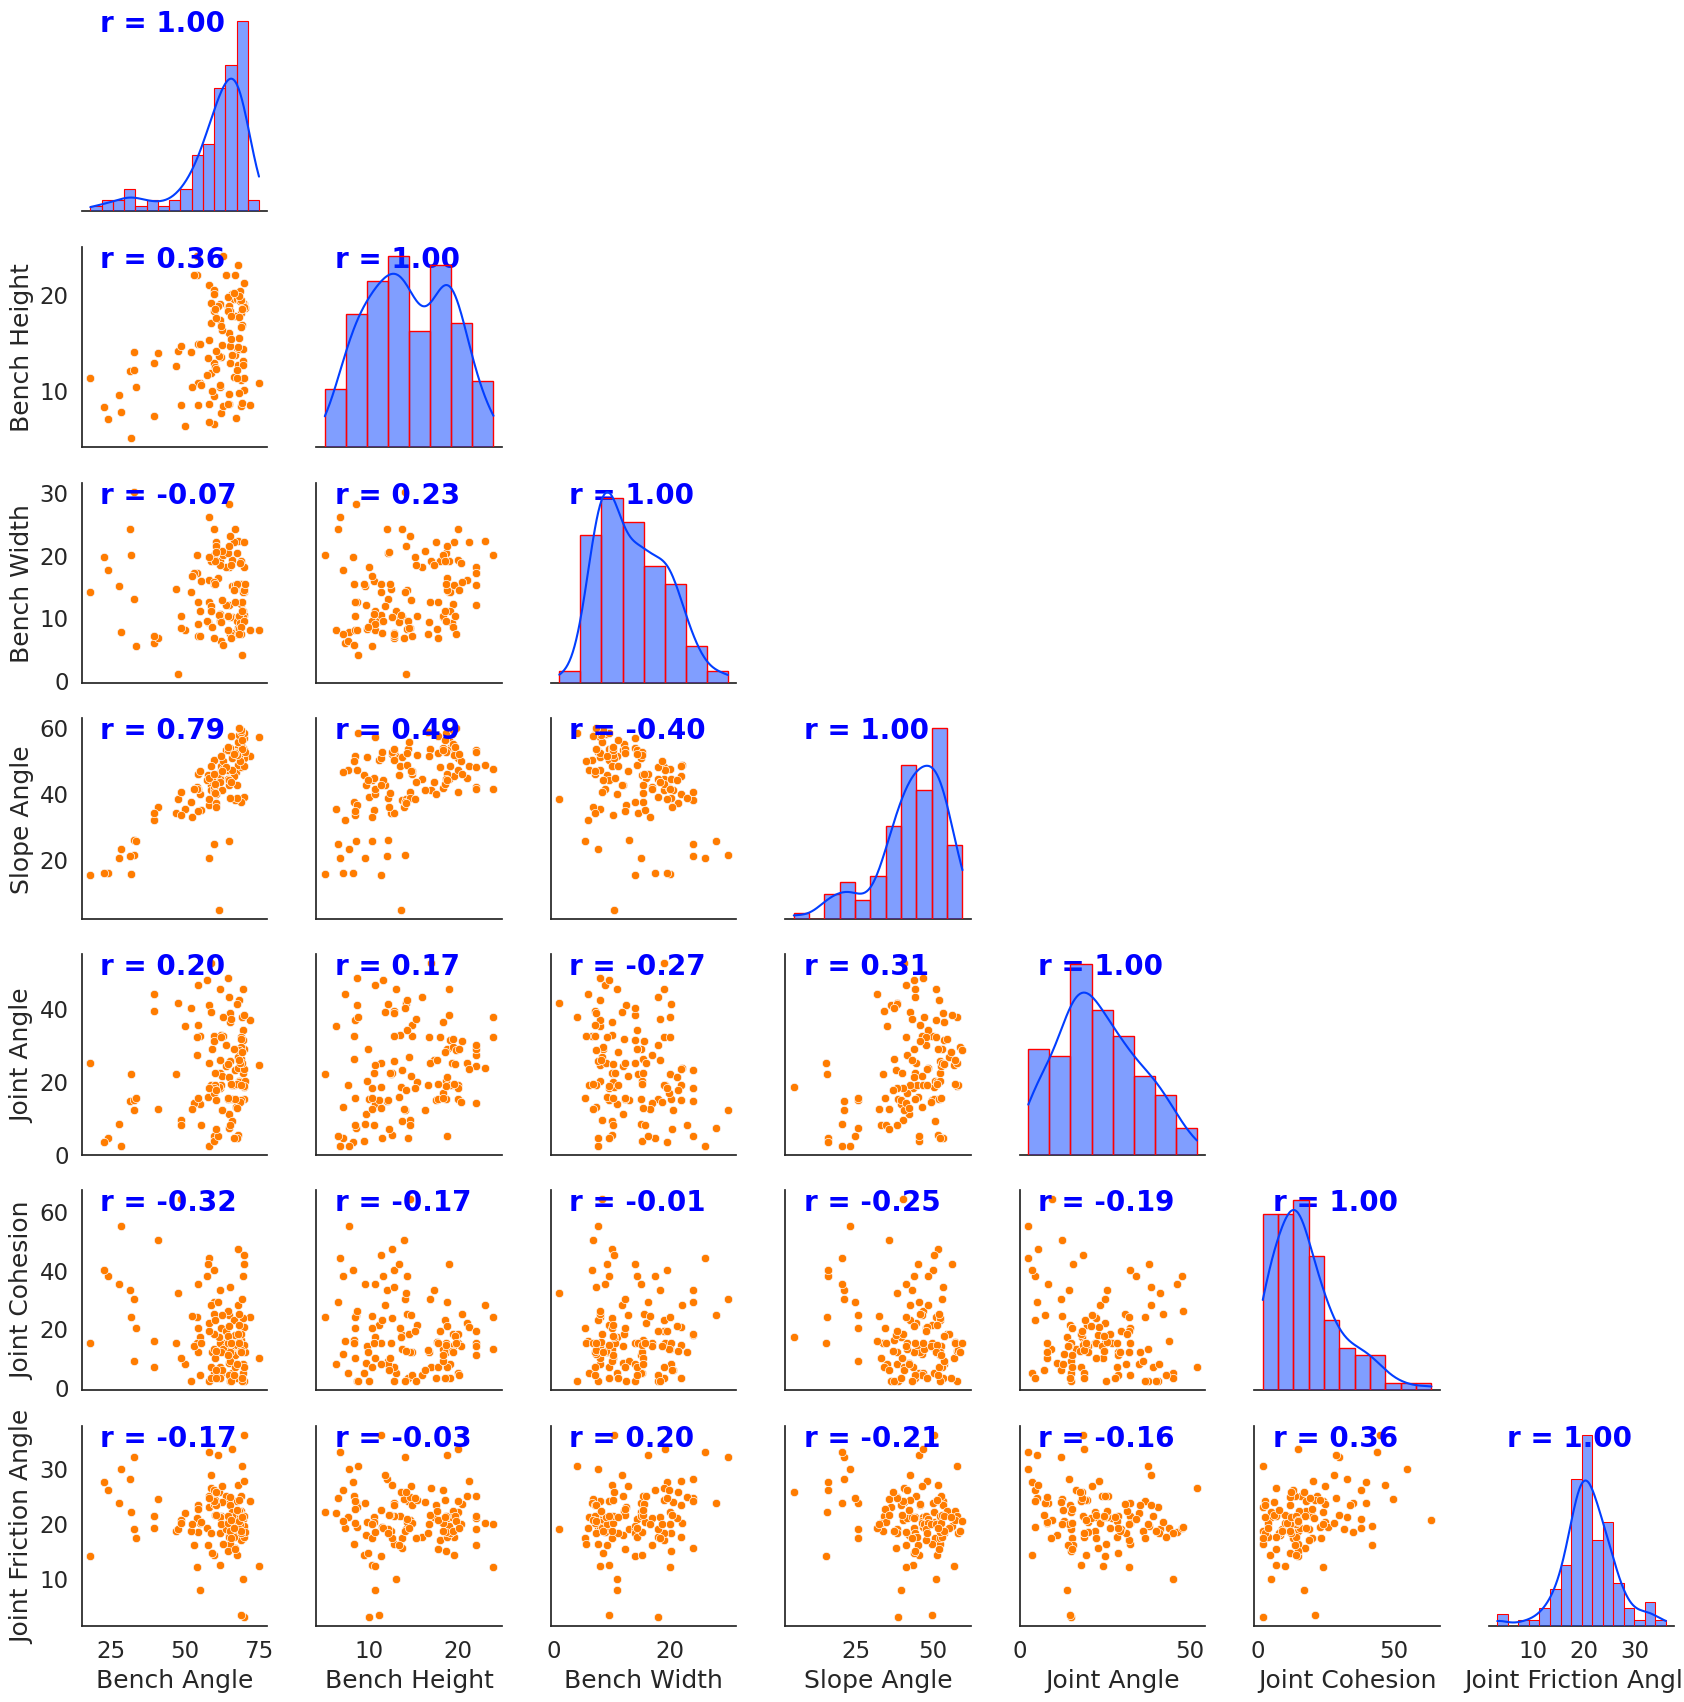

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(rc={"figure.dpi":600})
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_palette('bright')

from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes, fontsize=20, weight='bold', color='blue')



def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('Corr. = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()



df1=df.drop(['No','class_label','FoS'], axis=1)
print(df1)

df1 = df1.set_axis(["Bench Angle", "Bench Height", "Bench Width", "Slope Angle", "Joint Angle","Joint Cohesion","Joint Friction Angle"], axis=1)
#df1 = df1.set_axis(["Bench Angle", "Bench Height", "Bench Width", "Slope Angle", "Joint Angle","Joint Cohesion","Joint Friction Angle","Factor of Safety"], axis=1)
#variables = ["Bench Angle", "Bench Height", "Bench Width", "Slope Angle", "Joint Angle","Joint Cohesion","Joint Friction Angle","Factor of Safety"]
print(df1)


g = sns.PairGrid(df1,diag_sharey=False, corner=True)
#g = sns.PairGrid(df1,diag_sharey=False)

g.map_diag(sns.histplot, kde=True, edgecolor='red')
g.map_lower(sns.scatterplot)
#g.map_upper(reg_coef, hue=None)
#g.map_lower(reg_coef, hue=None)
g.map_lower(sns.scatterplot)
#g.map_offdiag(sns.scatterplot)
g.map(corrfunc)
#g.add_legend()
#g.fig.set_dpi(600)

plt.show()

# Summary of statistics of data frame

In [15]:
df1

,Bench Angle,Bench Height,Bench Width,Slope Angle,Joint Angle,Joint Cohesion,Joint Friction Angle
0,70.0,10.0,18.0,38.69,15.0,2.0,3.0
1,32.0,5.0,20.0,15.46,22.0,24.0,22.0
2,33.0,14.0,30.0,21.13,12.0,30.0,32.0
3,31.5,12.0,24.0,21.05,14.5,33.0,28.0
4,28.0,9.5,15.0,20.44,8.2,35.0,23.7
...,...,...,...,...,...,...,...
120,68.8,19.4,8.5,58.87,29.4,12.0,18.7
121,68.3,19.8,7.4,59.74,28.5,15.0,20.4
122,65.7,15.3,18.4,43.26,36.8,2.0,17.4
123,66.6,20.1,14.3,51.76,28.8,4.0,19.1


In [16]:
df1[["Bench Angle","Bench Height", "Bench Width", "Slope Angle", "Joint Angle","Joint Cohesion","Joint Friction Angle"]].describe()

,Bench Angle,Bench Height,Bench Width,Slope Angle,Joint Angle,Joint Cohesion,Joint Friction Angle
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,59.893600,14.492000,13.669120,43.413120,23.115200,18.145600,20.845680
std,11.528455,4.616583,5.699914,10.890347,11.756152,12.454818,5.150986
min,18.200000,5.000000,1.030000,4.740000,2.400000,2.000000,3.000000
25%,58.000000,10.700000,9.100000,38.460000,14.900000,9.000000,18.300000
50%,63.000000,14.100000,12.500000,45.400000,22.000000,15.000000,20.600000
75%,68.000000,18.700000,18.400000,51.390000,32.000000,24.000000,23.700000
max,75.000000,24.000000,30.000000,59.740000,52.100000,64.000000,36.000000


In [17]:
import statistics
df1.median()

,0
Bench Angle,63.0
Bench Height,14.1
Bench Width,12.5
Slope Angle,45.4
Joint Angle,22.0
Joint Cohesion,15.0
Joint Friction Angle,20.6


<ipython-input-18-d02df8cc00c4>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  gfg=sns.histplot(data=data1, kde=True, color='orange', edgecolor='red', palette='bright')


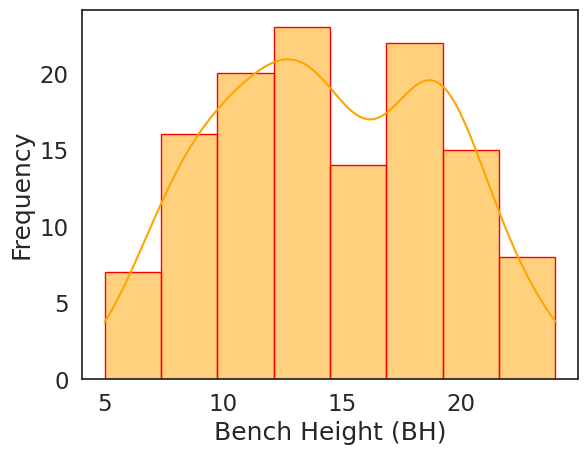

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")


data1=df1['Bench Height']
gfg=sns.histplot(data=data1, kde=True, color='orange', edgecolor='red', palette='bright')
gfg.set(xlabel ="Bench Height (BH)", ylabel = "Frequency")
sns.set(font_scale=2)

#Dimensionality Reduction and Visualization

In [19]:
#class_label = np.where(df['FoS'] > 1.3, 1, 0)
class_label

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [20]:
df1

,Bench Angle,Bench Height,Bench Width,Slope Angle,Joint Angle,Joint Cohesion,Joint Friction Angle
0,70.0,10.0,18.0,38.69,15.0,2.0,3.0
1,32.0,5.0,20.0,15.46,22.0,24.0,22.0
2,33.0,14.0,30.0,21.13,12.0,30.0,32.0
3,31.5,12.0,24.0,21.05,14.5,33.0,28.0
4,28.0,9.5,15.0,20.44,8.2,35.0,23.7
...,...,...,...,...,...,...,...
120,68.8,19.4,8.5,58.87,29.4,12.0,18.7
121,68.3,19.8,7.4,59.74,28.5,15.0,20.4
122,65.7,15.3,18.4,43.26,36.8,2.0,17.4
123,66.6,20.1,14.3,51.76,28.8,4.0,19.1


In [21]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df1)) #scaling the data
scaled_data
#sns.heatmap(scaled_data.corr())

,0,1,2,3,4,5,6
0,0.880176,-0.976930,0.762873,-0.435443,-0.693072,-1.301550,-3.478459
1,-2.429280,-2.064340,1.115167,-2.577109,-0.095243,0.471943,0.224999
2,-2.342189,-0.107001,2.876640,-2.054369,-0.949284,0.955622,2.174187
3,-2.472826,-0.541965,1.819756,-2.061745,-0.735774,1.197462,1.394512
4,-2.777644,-1.085671,0.234431,-2.117983,-1.273820,1.358689,0.556361
...,...,...,...,...,...,...,...
120,0.775667,1.067402,-0.910526,1.425031,0.536748,-0.495417,-0.418233
121,0.732121,1.154395,-1.104288,1.505240,0.459884,-0.253577,-0.086871
122,0.505685,0.175726,0.833332,-0.014117,1.168739,-1.301550,-0.671628
123,0.584067,1.219640,0.111128,0.769532,0.485506,-1.140324,-0.340266


Text(0.5, 1.0, 'PCA')

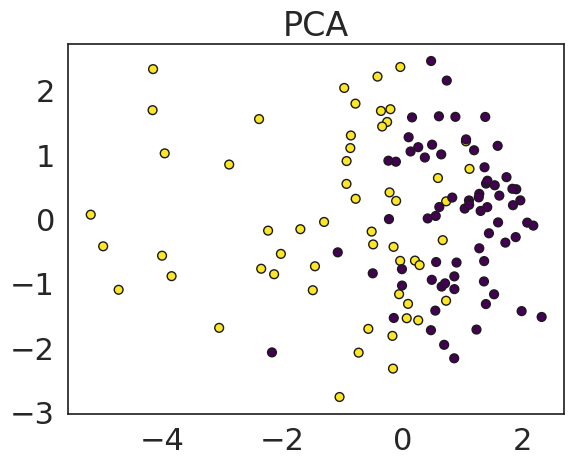

In [24]:
#Applying PCA
#Taking no. of Principal Components as 2
sns.set_style("white")

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
#data_pca.head()
#plt.figure(figsize=(10, 8))
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("PCA")

Text(0.5, 1.0, 'TSNE')

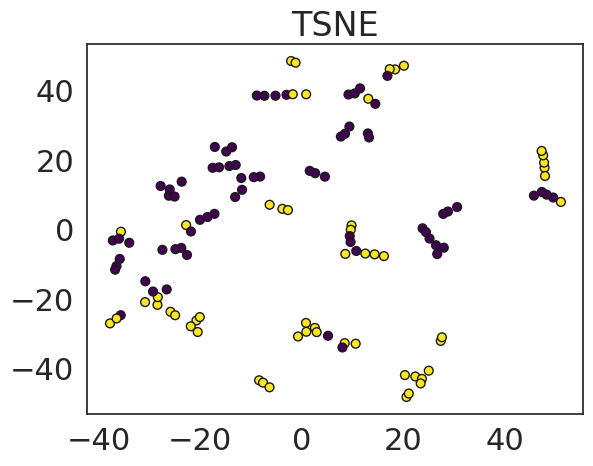

In [32]:
#Applying TSNE
sns.set_style("white")
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(scaled_data)
#X_embedded
X_embedded.shape
#X_embedded[:,0]
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("TSNE")

Text(0.5, 1.0, 'LLE')

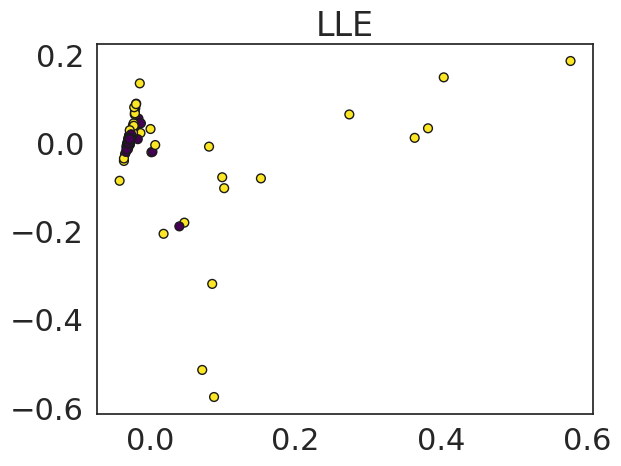

In [26]:
#Locally Linear Embedding
sns.set_style("white")
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(scaled_data)
X_transformed.shape
#X_transformed[:,0]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("LLE")

Text(0.5, 1.0, 'SE')

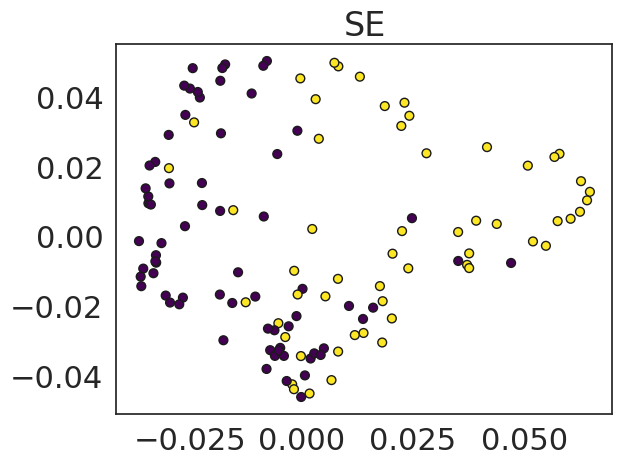

In [27]:
#Spectral Embedding
sns.set_style("white")
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2)
X_transformed = embedding.fit_transform(scaled_data)
X_transformed.shape
#X_transformed[:,0]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("SE")

Text(0.5, 1.0, 'KPCA')

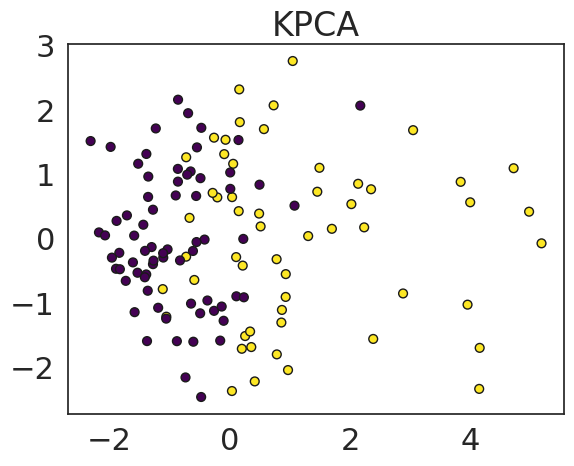

In [28]:
#Kernel PCA
sns.set_style("white")
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(scaled_data)
X_transformed.shape
#X_transformed[:,0]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("KPCA")

Text(0.5, 1.0, 'MDS')

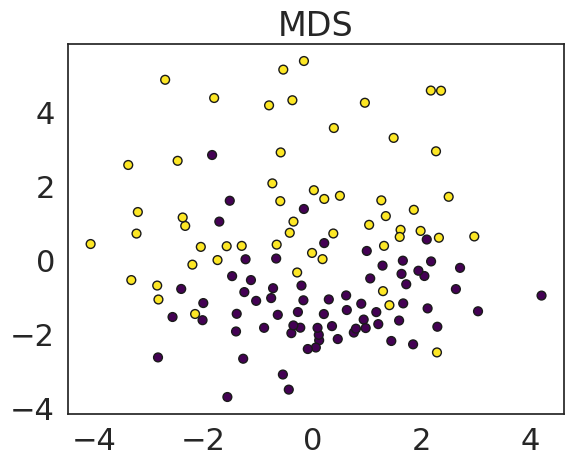

In [31]:
#MDS Embedding
sns.set_style("white")
from sklearn.manifold import MDS
embedding = MDS(n_components=2, normalized_stress='auto')
X_transformed = embedding.fit_transform(scaled_data)
X_transformed.shape
#X_transformed[:,0]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("MDS")

Text(0.5, 1.0, 'ISOMAP')

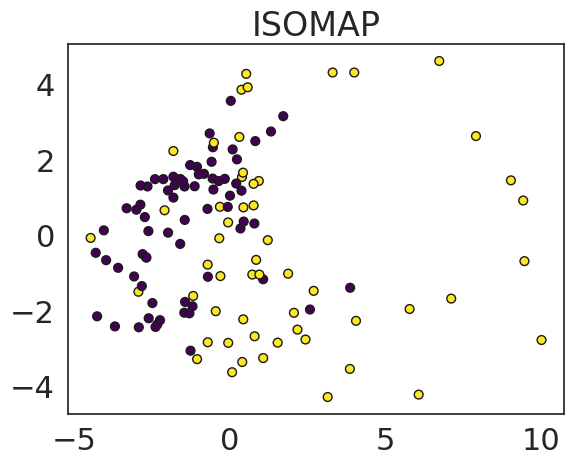

In [30]:
#IsoMap Embedding
sns.set_style("white")
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(scaled_data)
X_transformed.shape
#X_transformed[:,0]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=class_label, cmap='viridis', edgecolors='k', s=40)
plt.title("ISOMAP")

In [33]:
df1

,Bench Angle,Bench Height,Bench Width,Slope Angle,Joint Angle,Joint Cohesion,Joint Friction Angle
0,70.0,10.0,18.0,38.69,15.0,2.0,3.0
1,32.0,5.0,20.0,15.46,22.0,24.0,22.0
2,33.0,14.0,30.0,21.13,12.0,30.0,32.0
3,31.5,12.0,24.0,21.05,14.5,33.0,28.0
4,28.0,9.5,15.0,20.44,8.2,35.0,23.7
...,...,...,...,...,...,...,...
120,68.8,19.4,8.5,58.87,29.4,12.0,18.7
121,68.3,19.8,7.4,59.74,28.5,15.0,20.4
122,65.7,15.3,18.4,43.26,36.8,2.0,17.4
123,66.6,20.1,14.3,51.76,28.8,4.0,19.1


# scatter plot any two features and find best fit line

-0.2131825208546192
LinregressResult(slope=-0.10083243370946336, intercept=25.22313054452098, rvalue=-0.21318252085461914, pvalue=0.01698576667907906, stderr=0.04166737797913485, intercept_stderr=1.8645161565231643)


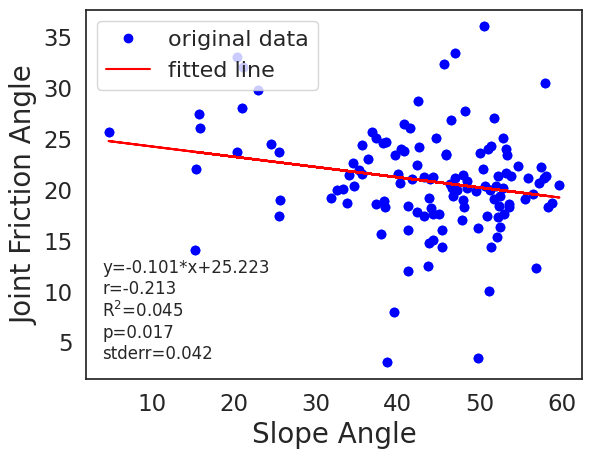

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr


x1=df1["Slope Angle"]
x2=df1["Joint Friction Angle"]

#x1=df["JF"]
#x2=df["FoS"]

r,p= pearsonr(x1,x2)
print(r)
plt.scatter(x1,x2)

print(stats.linregress(x1,x2))

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x1,x2)
res = stats.linregress(x1, x2)
plt.plot(x1, x2, 'o', label='original data',color='blue')
plt.plot(x1, res.intercept + res.slope*x1, 'red', label='fitted line')
#plt.plot(x1, slope*x1+intercept)
plt.annotate("y=%.3f*x+%.3f\nr=%.3f\nR$^2$=%.3f\np=%.3f\nstderr=%.3f"%(slope,intercept,r,rvalue**2,pvalue,stderr),xy=(0.16,0.21), xycoords='figure fraction', fontsize=12)
plt.legend(fontsize=16, loc='upper left')
plt.xlabel("Slope Angle", fontsize=20)
plt.ylabel("Joint Friction Angle", fontsize=20)
plt.show()

# Radar Chart Plot of Accuracy

In [ ]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import kaleido

import plotly.graph_objects as go

# Sample data
# df_radar = pd.DataFrame(dict(
#     value = [56, 68, 67, 54, 60, 92, 98, 93, 96, 88],
#     variable = ['V1', 'V2', 'V3', 'V4', 'V5', 'V1', 'V2', 'V3', 'V4', 'V5'],
#     group = ['A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C']))


# df_radar = pd.DataFrame(dict(
#     value = [0.9200, 0.9200, 0.8400, 0.9200, 0.9201, 0.8800, 0.9200,  0.8892, 0.9200, 0.9600],
#     variable = ['K-NN(k=5)', 'SVM(linear)', 'DT(Gini)', 'RF(Gini)', 'Bagging(SVM(linear))', 'Bagging(DT(Gini))', 'Bagging(RF(Gini))', 'Boosting(SVM(linear))', 'Boosting(DT(Gini))', 'Boosting(RF(Gini))'],
#     group = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']))



df_radar = pd.DataFrame(dict(
    value = [0.8157, 0.8947, 0.8947, 0.8684, 0.8421, 0.7894, 0.8947, 0.8947, 0.9210, 0.9210,
             0.8800, 0.9200, 0.9200, 0.8400, 0.8400, 0.8800, 0.9200, 0.9200, 0.9200, 0.9600],
    variable = ['K-NN(k=3)', 'K-NN(k=5)', 'SVM(linear)', 'SVM(poly)', 'DT(Entropy)', 'DT(Gini)', 'RF(Entropy)', 'RF(Gini)','Bagging', 'Boosting',
                'K-NN(k=3)', 'K-NN(k=5)', 'SVM(linear)', 'SVM(poly)', 'DT(Entropy)', 'DT(Gini)', 'RF(Entropy)', 'RF(Gini)','Bagging', 'Boosting']
    #group = ['70:30','70:30', '70:30', '70:30','70:30', '70:30', '70:30','70:30', '70:30','70:30',
    #        '80:20','80:20', '80:20', '80:20','80:20', '80:20', '80:20','80:20', '80:20','80:20']
    ))


#fig = px.line_polar(df_radar, r = 'value', theta = 'variable', line_close=True, line_dash = 'group', color_discrete_sequence=px.colors.sequential.Redor_r, template="plotly_white")

fig = px.line_polar(df_radar, r = 'value', theta = 'variable', line_close=True, color_discrete_sequence=px.colors.sequential.Redor_r, template="plotly_white")


#fig.update_polars(angularaxis_type="category")
#fig.update_traces(fill='toself')

value = [0.8157, 0.8947, 0.8947, 0.8684, 0.8421, 0.7894, 0.8947, 0.8947, 0.9210, 0.9210,
             0.8800, 0.9200, 0.9200, 0.8400, 0.8400, 0.8800, 0.9200, 0.9200, 0.9200, 0.9600]

variable = ['K-NN(k=3)', 'K-NN(k=5)', 'SVM(linear)', 'SVM(poly)', 'DT(Entropy)', 'DT(Gini)', 'RF(Entropy)', 'RF(Gini)','Bagging', 'Boosting',
                'K-NN(k=3)', 'K-NN(k=5)', 'SVM(linear)', 'SVM(poly)', 'DT(Entropy)', 'DT(Gini)', 'RF(Entropy)', 'RF(Gini)','Bagging', 'Boosting']

target_names=['tt','ee']
for i in range(2):
    fig.add_trace(
                go.Scatterpolar(r = value[(10*i):(10*(i+1))], theta = variable[(10*i):(10*(i+1))],name=target_names[i],
                                showlegend=True,
                                )
                )


#fig.update_traces(mode="markers+lines", marker=dict(symbol="square", color = "royalblue", size=8))



fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,  # Set the font size here
        #color="#9400D3"
    )
)


# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(
#                         visible=True,
#                         range=[0, 1]
#                     )
#             ),

#     title="IRIS Flower Variables According to Flower Categories"
# )

fig.show()

fig.write_image('/content/gdrive/MyDrive/Mining_Research/radar1.png')

#fig.savefig('/content/gdrive/MyDrive/Mining_Research/radar1.png')

In [ ]:
value = [0.8157, 0.8947, 0.8947, 0.8684, 0.8421, 0.7894, 0.8947, 0.8947, 0.9210, 0.9210,
             0.8800, 0.9200, 0.9200, 0.8400, 0.8400, 0.8800, 0.9200, 0.9200, 0.9200, 0.9600]
i=0
value[(10*i):(10*(i+1))]
#value[0:10]

[0.8157, 0.8947, 0.8947, 0.8684, 0.8421, 0.7894, 0.8947, 0.8947, 0.921, 0.921]

# Machine Learning Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(['No','FoS','class_label'],axis=1)
len(X)

125

In [ ]:
X

,BA,BH,BW,SA,JA,JC,JF
0,70.0,10.0,18.0,38.69,15.0,2.0,3.0
1,32.0,5.0,20.0,15.46,22.0,24.0,22.0
2,33.0,14.0,30.0,21.13,12.0,30.0,32.0
3,31.5,12.0,24.0,21.05,14.5,33.0,28.0
4,28.0,9.5,15.0,20.44,8.2,35.0,23.7
...,...,...,...,...,...,...,...
120,68.8,19.4,8.5,58.87,29.4,12.0,18.7
121,68.3,19.8,7.4,59.74,28.5,15.0,20.4
122,65.7,15.3,18.4,43.26,36.8,2.0,17.4
123,66.6,20.1,14.3,51.76,28.8,4.0,19.1


In [ ]:
#Reduced Dimension Data Frame

#Kernel PCA
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=4, kernel='linear')
X_transformed = transformer.fit_transform(scaled_data)
print(X_transformed.shape)
X=X_transformed

NameError: name 'scaled_data' is not defined

In [ ]:
y=df.class_label
y


,class_label
0,0
1,1
2,1
3,1
4,1
...,...
120,0
121,0
122,0
123,0


# Oversampling SMOTE

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [ ]:
y_train.ravel()

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
len(X_train)

87

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (112, 7)
Number transactions y_train dataset:  (112,)
Number transactions X_test dataset:  (13, 7)
Number transactions y_test dataset:  (13,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 43
Before OverSampling, counts of label '0': 44 

After OverSampling, the shape of train_X: (88, 7)
After OverSampling, the shape of train_y: (88,) 

After OverSampling, counts of label '1': 44
After OverSampling, counts of label '0': 44


In [ ]:
X_train

,BA,BH,BW,SA,JA,JC,JF
7,28.5,7.7,7.7,22.95,2.4,55.0,29.8
93,60.5,17.5,22.0,39.72,14.7,3.0,23.4
104,55.5,10.5,15.8,34.72,8.0,15.0,20.3
86,68.6,20.3,18.6,49.62,14.3,14.1,19.8
103,65.4,18.3,10.1,53.63,36.2,9.0,18.6
...,...,...,...,...,...,...,...
110,58.1,15.2,19.6,38.25,18.1,19.3,24.6
57,69.6,14.3,14.4,48.52,34.0,38.0,20.8
59,59.3,9.9,8.5,43.80,28.7,12.0,14.7
62,69.0,18.0,19.0,47.89,32.0,19.0,17.0


In [ ]:
X_train_res

,BA,BH,BW,SA,JA,JC,JF
0,68.800000,11.100000,9.500000,49.830000,14.700000,21.300000,3.400000
1,66.600000,11.400000,7.600000,52.430000,4.500000,23.000000,19.300000
2,53.000000,22.000000,17.000000,41.250000,14.000000,14.000000,16.000000
3,52.000000,14.000000,14.000000,37.390000,40.000000,2.000000,18.600000
4,54.000000,24.000000,20.000000,41.250000,32.000000,24.000000,12.000000
...,...,...,...,...,...,...,...
83,68.300000,9.700000,8.100000,50.710000,20.100000,14.000000,20.300000
84,66.000000,13.700000,10.000000,50.880000,9.100000,13.000000,17.400000
85,60.200000,18.500000,19.000000,42.630000,19.000000,23.000000,24.200000
86,64.400000,19.700000,10.300000,53.860000,24.600000,17.600000,21.300000


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7368421052631579

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
#create a new KNN model
knn_pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)

# Performance Measures
score = knn_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(knn_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))

Accuracy Score
0.7368421052631579
0.7368421052631579
Precision Recall F-Measure
(0.7852564102564102, 0.7472222222222222, 0.7301136363636364, None)
CV-Score
[0.76923077 0.92307692 0.84615385 0.84615385 0.76923077 0.83333333
 0.66666667 0.75       0.83333333 0.91666667]
cv_scores mean:0.8153846153846154
AUC-ROC Score
0.7472222222222222
87
38


# SVM/SVC Classifier + Kernel SVM / SVC



In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7894736842105263

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4)
#SVC_pipe=make_pipeline(StandardScaler(),SVC())
#SVC_pipe=make_pipeline(StandardScaler(),SVC(kernel='linear',gamma='auto'))
SVC_pipe=make_pipeline(StandardScaler(),SVC(kernel='poly',gamma='auto'))
#SVC_pipe=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma='auto'))


SVC_pipe.fit(X_train, y_train)
y_pred = SVC_pipe.predict(X_test)

# Performance Measures
score = SVC_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(SVC_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))

Accuracy Score
0.8421052631578947
0.8421052631578947
Precision Recall F-Measure
(0.8846153846153846, 0.8333333333333333, 0.8347826086956522, None)
CV-Score
[1.         0.84615385 0.76923077 0.84615385 0.69230769 0.83333333
 0.66666667 0.66666667 0.66666667 0.66666667]
cv_scores mean:0.7653846153846154
AUC-ROC Score
0.8333333333333333
87
38


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train, y_train)
ranfor.score(X_test, y_test)

0.92

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#create a new RF model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=13)
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)
#RF_pipe=make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,criterion='log_loss', max_depth=None))
#RF_pipe=make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=20))
RF_pipe=make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=20))

RF_pipe.fit(X_train, y_train)
y_pred = RF_pipe.predict(X_test)

# Performance Measures
score = RF_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(RF_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))

Accuracy Score
0.8421052631578947
0.8421052631578947
Precision Recall F-Measure
(0.8295454545454546, 0.8452380952380952, 0.8347826086956522, None)
CV-Score
[0.84615385 0.84615385 0.92307692 0.61538462 0.92307692 0.83333333
 0.83333333 0.83333333 0.91666667 1.        ]
cv_scores mean:0.8570512820512821
AUC-ROC Score
0.8452380952380952
87
38


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test, y_test)

0.8

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=13)
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)
#DT_pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy'))
DT_pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='gini', max_depth=2))
#DT_pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='log_loss'))

DT_pipe.fit(X_train, y_train)
y_pred = DT_pipe.predict(X_test)

# Performance Measures
score = DT_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(DT_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))

Accuracy Score
0.7894736842105263
0.7894736842105263
Precision Recall F-Measure
(0.7738095238095238, 0.7738095238095238, 0.7738095238095238, None)
CV-Score
[0.69230769 0.76923077 0.84615385 0.84615385 0.76923077 0.83333333
 0.66666667 0.83333333 0.91666667 1.        ]
cv_scores mean:0.8173076923076923
AUC-ROC Score
0.773809523809524
87
38


# Bagging Methods

In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [ ]:
# Load the dataset
#digit = load_digits()
#X, y = digit.data, digit.target

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the base classifier
DT = DecisionTreeClassifier()
DT_pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy'))

RF=RandomForestClassifier()
RF_pipe=make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=20,criterion='entropy', max_depth=None))

#SVC_pipe=SVC()
SVC_pipe=make_pipeline(StandardScaler(),SVC(kernel='linear',gamma='auto'))

# Build Model
Bagging_model = BaggingClassifier(estimator=SVC_pipe, n_estimators=100)
classifiers = Bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Bagging_model.predict(X_test)


# Performance Measures
score = Bagging_model.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(Bagging_model, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))



Accuracy Score
0.8421052631578947
0.8421052631578947
Precision Recall F-Measure
(0.8472222222222222, 0.8551136363636364, 0.8416666666666667, None)
CV-Score
[0.92307692 0.84615385 0.84615385 0.92307692 0.76923077 0.83333333
 0.66666667 1.         0.91666667 1.        ]
cv_scores mean:0.8724358974358974
AUC-ROC Score
0.8551136363636364
87
38


# Boosting Method (Adaboost)

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# create base classifier


# Import Support Vector Classifier
from sklearn.svm import SVC
# Import Decison Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import SRandom forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#DT = DecisionTreeClassifier(criterion='log_loss')
svc=SVC(kernel='linear',gamma='auto')
#RF = RandomForestClassifier(n_estimators=30,criterion='log_loss', max_depth=None)


# Create adaboost classifer object
#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
#abc =AdaBoostClassifier(n_estimators=50, base_estimator=RF,learning_rate=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
#ADB_pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(n_estimators=100, estimator=DT,learning_rate=0.001))
ADB_pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(n_estimators=100, estimator=svc,learning_rate=0.001,algorithm='SAMME'))
#ADB_pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(n_estimators=100, estimator=RF,learning_rate=0.1))


# Train Adaboost Classifer
#model = abc.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = model.predict(X_test)

# Train Adaboost Classifer
ADB_pipe.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = ADB_pipe.predict(X_test)

# Performance Measures
score = ADB_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(ADB_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
#print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))





Accuracy Score
0.7105263157894737
0.7105263157894737
Precision Recall F-Measure
(0.7708333333333333, 0.6820728291316527, 0.672156862745098, None)
CV-Score
[0.92307692 0.92307692 0.76923077 0.69230769 0.61538462 0.75
 0.66666667 0.58333333 0.75       0.91666667]
cv_scores mean:0.758974358974359
AUC-ROC Score
0.6820728291316526
87
38


# Boosting Method (Gradient Boosting Classifier)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


#create a new Gradient Bossting Classifier model
#GBC=GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
GBC_pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1))


# Train GradientBoosting Classifer
GBC_pipe.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = GBC_pipe.predict(X_test)

# Performance Measures
score = GBC_pipe.score(X_test, y_test)
acc_score = accuracy_score(y_test,y_pred)
PRF_Micro=precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro=precision_recall_fscore_support(y_test, y_pred, average='macro')
cv_scores = cross_val_score(knn_pipe, X, y, cv=10)
#print each cv score (accuracy) and average them
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy Score")
print(score)
print(acc_score)
print("Precision Recall F-Measure")
print(PRF_Micro)
print(PRF_Macro)
print("CV-Score")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print("AUC-ROC Score")
print(auc_score)

print(len(y_train))
print(len(y_test))

Accuracy Score
0.8421052631578947
0.8421052631578947
Precision Recall F-Measure
(0.8421052631578947, 0.8421052631578947, 0.8421052631578947, None)
(0.8444444444444444, 0.8444444444444444, 0.8421052631578947, None)
CV-Score
[0.76923077 0.92307692 0.84615385 0.84615385 0.76923077 0.83333333
 0.66666667 0.75       0.83333333 0.91666667]
cv_scores mean:0.8153846153846154
AUC-ROC Score
0.8444444444444443
87
38


#Regreesion Model for Stability Prediction

In [ ]:
print(df["FoS"])
print(df1)

0      0.20
1      4.96
2      2.90
3      2.28
4      2.90
       ... 
120    0.61
121    0.69
122    0.65
123    0.64
124    0.74
Name: FoS, Length: 125, dtype: float64
     Bench Angle  Bench Height  Bench Width  Slope Angle  Joint Angle  \
0           70.0          10.0         18.0        38.69         15.0   
1           32.0           5.0         20.0        15.46         22.0   
2           33.0          14.0         30.0        21.13         12.0   
3           31.5          12.0         24.0        21.05         14.5   
4           28.0           9.5         15.0        20.44          8.2   
..           ...           ...          ...          ...          ...   
120         68.8          19.4          8.5        58.87         29.4   
121         68.3          19.8          7.4        59.74         28.5   
122         65.7          15.3         18.4        43.26         36.8   
123         66.6          20.1         14.3        51.76         28.8   
124         69.3          

#Linear Regression

Coefficients: 
 [-0.02778124 -0.09701032  0.0291625  -0.00404646 -0.01338618  0.00189657
  0.06366621]
mean_squared_error :  0.17334976207533573
mean_absolute_error :  0.3359877102424363
mean_absolute_percentage_error :  0.29579945004858815
median_absolute_error :  0.31340082563363303
mean_poisson_deviance :  0.13208495502622267
r2 socre is  0.6819094128493304


<ipython-input-75-55fa74294879>:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


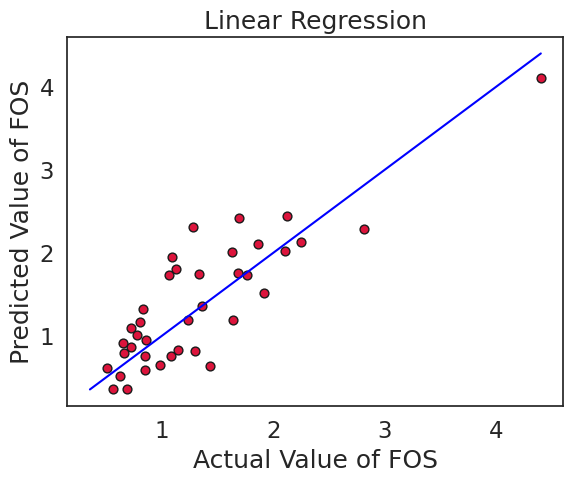

In [75]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance
from sklearn import preprocessing
from sklearn.metrics import r2_score

# importing data
# df = pd.read_csv('Real estate.csv')
# df.drop('No', inplace=True, axis=1)

# print(df.head())

# print(df.columns)


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# The coefficients
print("Coefficients: \n", model.coef_)

# making predictions
predictions = model.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

#plt.legend()
plt.title("Linear Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

#Support Vcetor Regression

mean_squared_error :  0.19112801883873817
mean_absolute_error :  0.2986159179683695
mean_absolute_percentage_error :  0.2873917459897992
median_absolute_error :  0.16915930934945145
mean_poisson_deviance :  0.14016649763969657
r2 socre is  0.7108295208021465


<ipython-input-136-a6bfea5a7a8d>:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


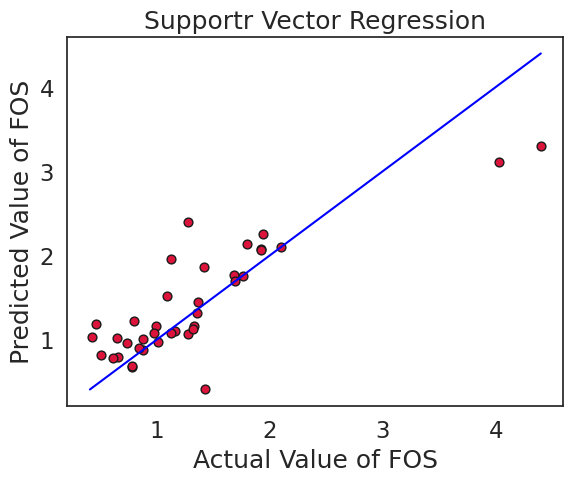

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
SVR_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# fitting the model
SVR_regr.fit(X_train, y_train)

# making predictions
predictions = SVR_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Supportr Vector Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# MLP Regression

mean_squared_error :  0.10745226170562014
mean_absolute_error :  0.20013917485244606
mean_absolute_percentage_error :  0.1506201683045787
median_absolute_error :  0.14312197925205272
mean_poisson_deviance :  0.04947810264265784
r2 socre is  0.8528503179819001


<ipython-input-79-1233aaab97b6>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


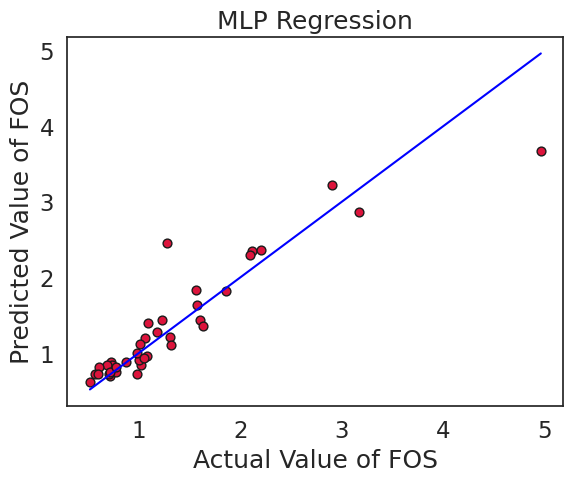

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
MLP_regr = make_pipeline(StandardScaler(), MLPRegressor(max_iter=500))

# fitting the model
MLP_regr.fit(X_train, y_train)

# making predictions
predictions = MLP_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("MLP Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# Bayesian Ridge Regression

mean_squared_error :  0.25325074815504955
mean_absolute_error :  0.387317269833319
mean_absolute_percentage_error :  0.2814158997712748
median_absolute_error :  0.3084578452239841
mean_poisson_deviance :  0.13160476093528525
r2 socre is  0.6633629685598535


<ipython-input-80-6f02cfff0346>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


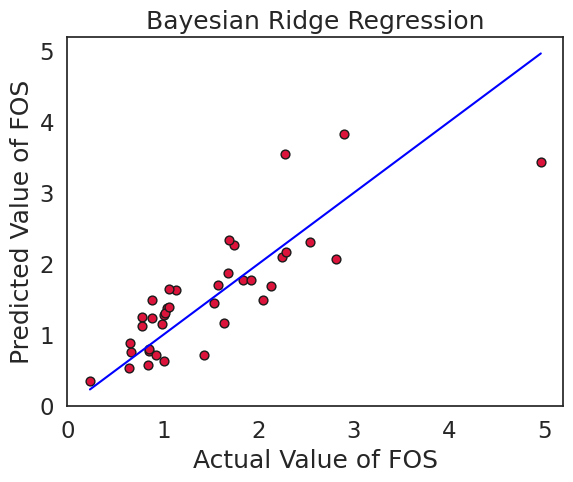

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
BR_regr = make_pipeline(StandardScaler(), BayesianRidge())

# fitting the model
BR_regr.fit(X_train, y_train)


# making predictions
predictions = BR_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Bayesian Ridge Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

#Elastic Net Regression

mean_squared_error :  0.41096490766215077
mean_absolute_error :  0.4705131948702245
mean_absolute_percentage_error :  0.4689873322325429
median_absolute_error :  0.3804192078723125
mean_poisson_deviance :  0.2571430759821048
r2 socre is  0.21490194013884678


<ipython-input-138-fc1319b89519>:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


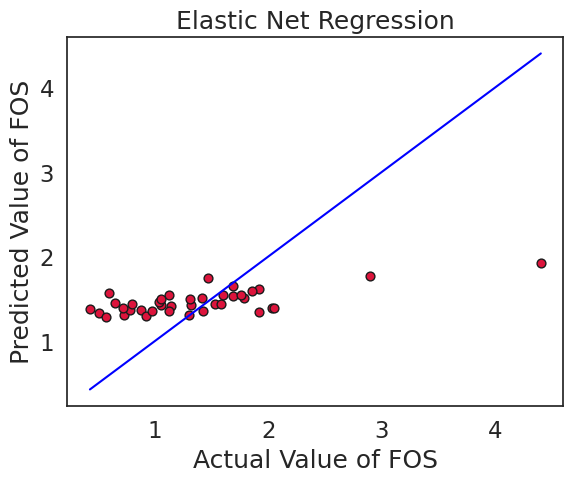

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
ElasticNet_regr = make_pipeline(StandardScaler(), ElasticNet())

# fitting the model
ElasticNet_regr.fit(X_train, y_train)

# making predictions
predictions = ElasticNet_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Elastic Net Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# LassoCV Regression

mean_squared_error :  0.22611201301067116
mean_absolute_error :  0.3472278765053191
mean_absolute_percentage_error :  0.28298193193590643
median_absolute_error :  0.2533101127207701
mean_poisson_deviance :  0.13292554098497864
r2 socre is  0.7215354098488171


<ipython-input-151-5f06e62f9f6a>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


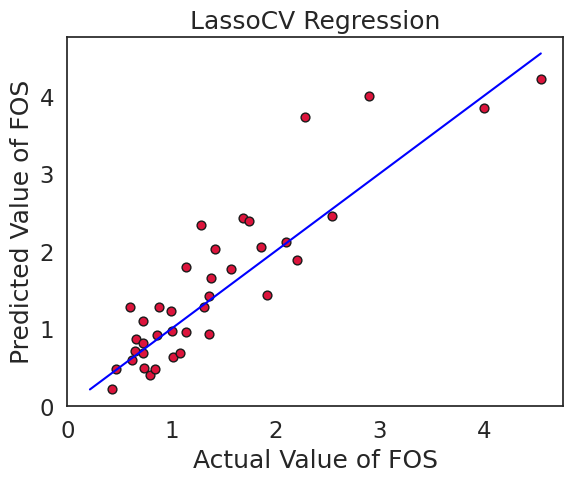

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
LassoCV_regr = make_pipeline(StandardScaler(), LassoCV())

# fitting the model
LassoCV_regr.fit(X_train, y_train)


# making predictions
predictions = LassoCV_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("LassoCV Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

#Lars Regression

mean_squared_error :  0.27492273168348974
mean_absolute_error :  0.3885891752662718
mean_absolute_percentage_error :  0.27127568900333
median_absolute_error :  0.28637276345781315
mean_poisson_deviance :  0.1859831266667233
r2 socre is  0.807272811565833


<ipython-input-140-e41c3b7a7446>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


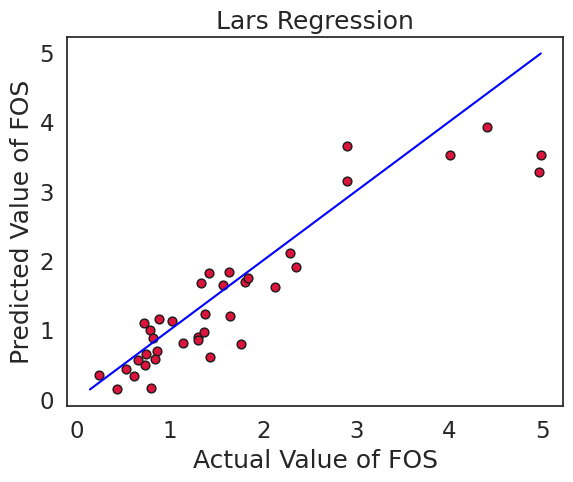

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
Lars_regr = make_pipeline(StandardScaler(), Lars())

# fitting the model
Lars_regr.fit(X_train, y_train)


# making predictions
predictions = Lars_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Lars Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# Lasso Lars CV Regression

mean_squared_error :  0.20762873752935068
mean_absolute_error :  0.3155157532472019
mean_absolute_percentage_error :  0.2343411822776492
median_absolute_error :  0.23070655324732658
mean_poisson_deviance :  0.10350466188286911
r2 socre is  0.8136929072691048


<ipython-input-110-2e7f58243073>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


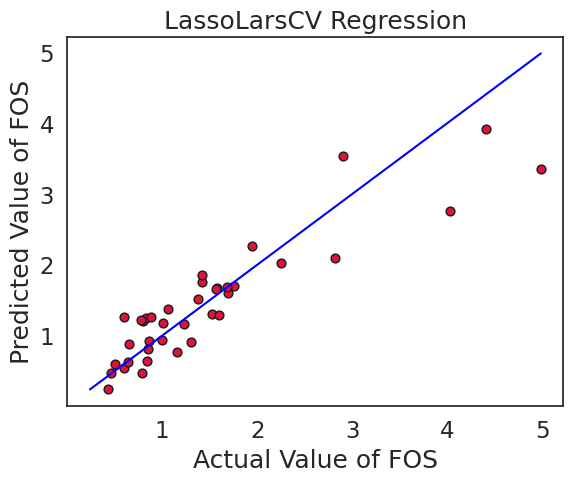

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
LassoLarsCV_regr = make_pipeline(StandardScaler(), LassoLarsCV())

# fitting the model
LassoLarsCV_regr.fit(X_train, y_train)


# making predictions
predictions = LassoLarsCV_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("LassoLarsCV Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# Decision Tree Regression

mean_squared_error :  0.2506087631578947
mean_absolute_error :  0.3540789473684211
mean_absolute_percentage_error :  0.5507957157835683
median_absolute_error :  0.2300000000000001
mean_poisson_deviance :  0.19253256985353503
r2 socre is  0.7349532235637838


<ipython-input-131-a354e5d3bb4d>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


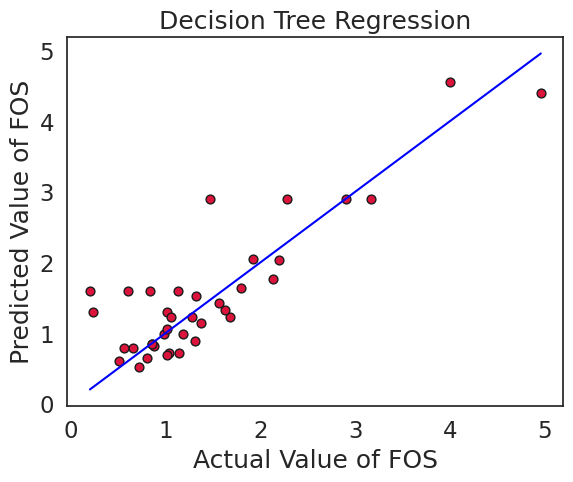

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
DT_regr = make_pipeline(StandardScaler(), DecisionTreeRegressor())

# fitting the model
DT_regr.fit(X_train, y_train)


# making predictions
predictions = DT_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Decision Tree Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

# Random Forest Regression

mean_squared_error :  0.18645629519210538
mean_absolute_error :  0.30492289473684253
mean_absolute_percentage_error :  0.33509701453646373
median_absolute_error :  0.16520000000000146
mean_poisson_deviance :  0.1167043039620055
r2 socre is  0.8152728066027382


<ipython-input-129-b6d59e27f948>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


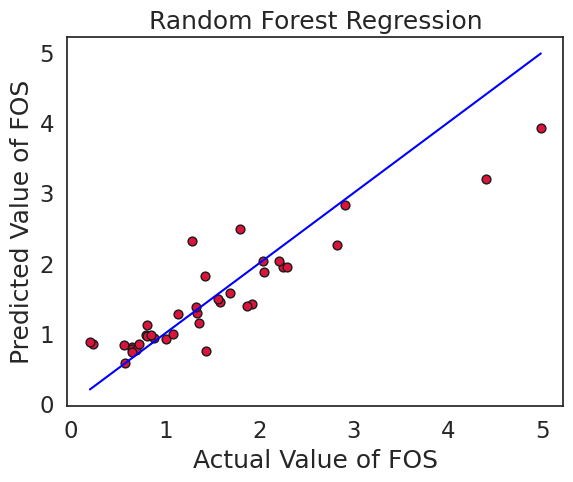

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
RF_regr = make_pipeline(StandardScaler(), RandomForestRegressor())

# fitting the model
RF_regr.fit(X_train, y_train)


# making predictions
predictions = RF_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Random Forest Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

#Bagging Regression

mean_squared_error :  0.1515728263157894
mean_absolute_error :  0.273278947368421
mean_absolute_percentage_error :  0.21002755800636824
median_absolute_error :  0.20649999999999957
mean_poisson_deviance :  0.0784704148392124
r2 socre is  0.8480276772828198


<ipython-input-118-a52e8295c617>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


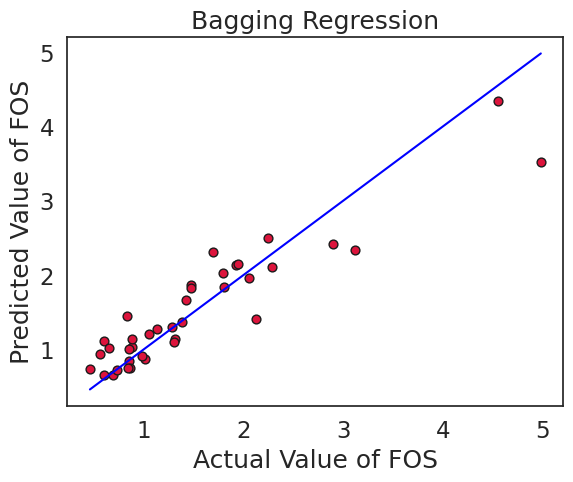

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
Bagging_regr = make_pipeline(StandardScaler(), BaggingRegressor())

# fitting the model
Bagging_regr.fit(X_train, y_train)


# making predictions
predictions = Bagging_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("Bagging Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))

#AdaBoost Regression

mean_squared_error :  0.16397474426535713
mean_absolute_error :  0.3072936524499589
mean_absolute_percentage_error :  0.3131528301788183
median_absolute_error :  0.20949882352941168
mean_poisson_deviance :  0.1249265664004442
r2 socre is  0.8146839243287614


<ipython-input-119-c4bd5653d1b9>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')


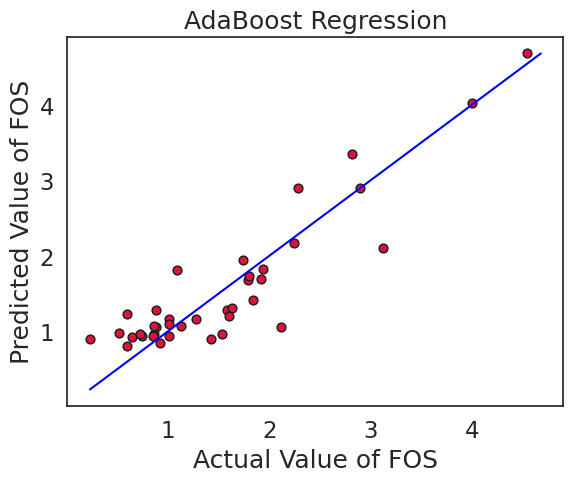

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


# creating feature variables
X = df1
y = df['FoS']

#print(X)
#print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#making model pipe
AdaBoost_regr = make_pipeline(StandardScaler(), AdaBoostRegressor())

# fitting the model
AdaBoost_regr.fit(X_train, y_train)


# making predictions
predictions = AdaBoost_regr.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('median_absolute_error : ', median_absolute_error(y_test, predictions))
print('mean_poisson_deviance : ', mean_poisson_deviance(y_test, predictions))

score=r2_score(y_test,predictions)

print('r2 socre is ',score)

#print(np.array(y_test))
#print(np.array(predictions))

plt.scatter(y_test,predictions, cmap='viridis', edgecolors='k', s=40, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')

plt.title("AdaBoost Regression")
plt.xlabel("Actual Value of FOS")
plt.ylabel("Predicted Value of FOS")
plt.show()

#print(np.array(y_test))
#print(np.array(predictions))